Prediction at x0: 10.582483592074242


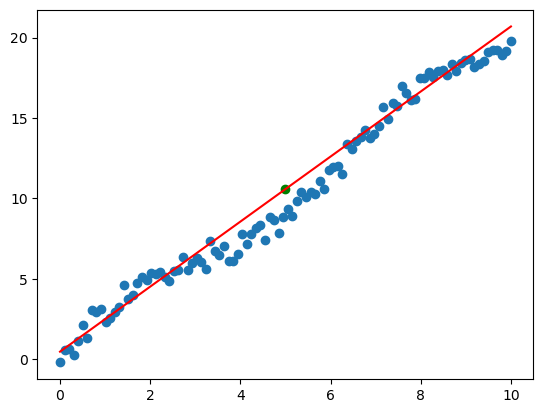

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
X = np.linspace(0, 10, 100)
Y = 2 * X + np.sin(X) + np.random.normal(0, 0.5, 100)

# Smoothing parameter
t = 0.5

# Point of interest
x0 = 5.0

# Calculate weights using the Gaussian kernel
def calculate_weights(X, x0, t):
    return np.exp(-(X - x0)*2 / (2 * t*2))

weights = calculate_weights(X, x0, t)

# Add a bias term to X
X_bias = np.vstack((np.ones(len(X)), X)).T

# Calculate the weight matrix
W = np.diag(weights)

# Calculate the model term parameter
XtWX = X_bias.T @ (W @ X_bias)
XtWy = X_bias.T @ (W @ Y)
beta = np.linalg.inv(XtWX) @ XtWy

# Prediction at x0
x0_bias = np.array([1, x0])
prediction = x0_bias @ beta

print("Prediction at x0:", prediction)

# Plot the data and the LWR prediction
plt.scatter(X, Y, label='Sample Data')
plt.plot(X, X_bias @ beta, color='red', label='LWR Prediction')
plt.scatter(x0, prediction, color='green', label=f'Prediction at x0 ({x0})')
plt.show()